# Indicators of Heavy Traffic on I-94

## Introduction

This project aims to analyze the westbound traffic on the I-94 Interstate highway, focusing on data collected by a station situated midway between Minneapolis and Saint Paul. The primary goal is to identify key indicators of heavy traffic, such as weather conditions, time of day, and day of the week. The analysis leverages traffic volume data to discern patterns and trends that can inform better traffic management strategies for this specific stretch of highway.

To achieve this, we employ a range of analytical techniques using Python and its libraries, including Pandas, Matplotlib, and Seaborn. Our approach includes examining summary statistics, histogram distributions, and time-based patterns to isolate factors that significantly influence traffic volume.

Key findings indicate that traffic volumes peak during morning and evening rush hours on business days, with notable dips during nighttime and weekends. Weather conditions, particularly "Light rain and snow" and "Shower snow," are associated with higher traffic volumes, though the overall correlation with weather factors remains weak. These insights are intended to aid in optimizing traffic management and efficiency for westbound traffic near the data collection station.

## Variable Type

|Variable|Description|
|--------|----------|
|holiday|US National holidays plus regional holiday, Minnesota State Fair|
|temp|Average temp in kelvin|
|rain_1h|Amount in mm of rain that occured in the hour|
|snow_1h|Amount in mm of snow that occured in the hour|
|clouds_all|Percentage of cloud cover|
|weather_main|Short textual description of the current weather|
|weather_description|Longer textual description of the current weather|
|date_time|Hour of the data collected in local CST time|
|traffic_volume|Hourly I-94 ATR 301 reported westbound traffic volume|


In [181]:
import pandas as pd
metro = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [182]:
metro.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


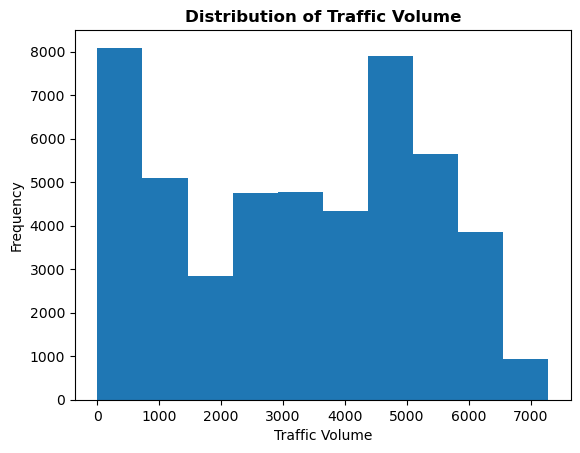

In [183]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(metro['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Traffic Volume', fontweight='bold')
plt.show()

In [184]:
metro['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

## Observations from the Histogram

### Distribution Shape
- The histogram shows a multimodal distribution with several peaks, indicating that traffic volume has multiple common values or modes.

### High Frequency at Zero
- There is a significant number of observations with a traffic volume of zero. This could indicate periods with no traffic, possibly during nighttime or due to other factors.

### Peaks and Troughs
- The first peak is at the very beginning, indicating many instances of zero traffic volume.
- Another noticeable peak occurs around the 4000-5000 range.

### Spread of Data
- The data is spread across a wide range of values, with noticeable frequencies up to the maximum observed traffic volume (~7000 vehicles).

## Insights and Hypothesis

### Daytime vs. Nighttime Influence
- The high frequency of zero traffic volume entries likely corresponds to nighttime periods when traffic is minimal or non-existent.

### Rush Hours
- The peaks around 4000-5000 could represent rush hour traffic during daytime, when traffic volume is highest.

To further investigate the influence of daytime and nighttime on traffic volume, we should segment the data by time of day and compare the traffic volume distributions for these segments. This will help us confirm whether the observed patterns are indeed related to the time of day.

## Traffic Volume: Day vs. Night
 

In [185]:
metro['date_time'] = pd.to_datetime(metro['date_time'])
print(metro['date_time'])

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]


In [186]:
day = metro.copy()[(metro['date_time'].dt.hour >=7) & (metro['date_time'].dt.hour <19)]
print(day.shape)
                                                
night = metro.copy()[(metro['date_time'].dt.hour >=19) | (metro['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


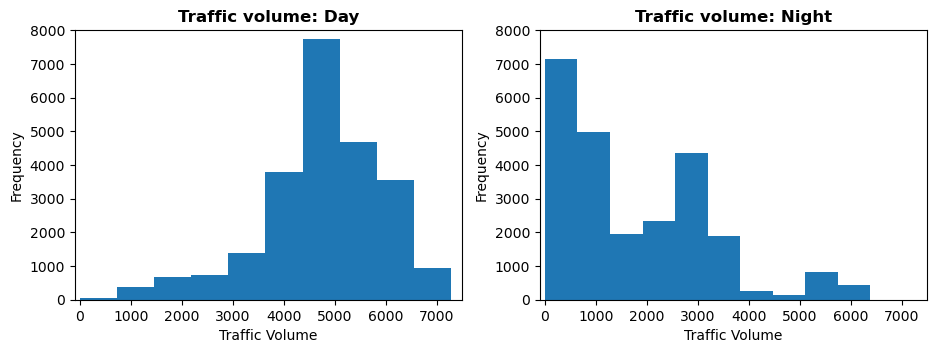

In [193]:
#Plotting histograms for day and night traffic volume
plt.figure(figsize=(11,3.5))
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Traffic volume: Day', fontweight='bold')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(-100,7500)
plt.ylim(0,8000)

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Traffic volume: Night', fontweight='bold')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.show()

### Analysis of Daytime and Nighttime Traffic Volumes

#### Daytime Traffic Volume
- **Count**: 29,904 entries
- **Mean**: Approximately 4,494 vehicles per hour
- **Standard Deviation**: 1,331 vehicles per hour
- **Min and Max**: Traffic volume ranges from 0 to 7,280 vehicles per hour
- **Percentiles**:
  - 25th percentile (Q1): 3,656 vehicles per hour
  - 50th percentile (Median): 4,677 vehicles per hour
  - 75th percentile (Q3): 5,445 vehicles per hour

**Histogram Shape**: 
The daytime traffic histogram has a left-skewed distribution, with a prominent peak in the range of 4000-5000 vehicles per hour, indicating that most of the traffic volumes are concentrated in this range. This suggests that heavy traffic is more common during the day.

#### Nighttime Traffic Volume
- **Count**: 18,300 entries
- **Mean**: Approximately 1,244 vehicles per hour
- **Standard Deviation**: 974 vehicles per hour
- **Min and Max**: Traffic volume ranges from 0 to 4,939 vehicles per hour
- **Percentiles**:
  - 25th percentile (Q1): 412 vehicles per hour
  - 50th percentile (Median): 842 vehicles per hour
  - 75th percentile (Q3): 2,044 vehicles per hour

**Histogram Shape**: 
The nighttime traffic histogram is right-skewed with a heavy concentration of traffic volumes towards the lower end of the spectrum. There is a significant number of entries with very low traffic volumes, indicating that most of the time, traffic is light during nighttime hours. 

### Interpretation
- **Daytime Traffic**: The daytime traffic volume is generally higher and shows more variability. The left-skewed distribution with a peak around 4000-5000 vehicles per hour suggests that heavy traffic is common during the day. 
- **Nighttime Traffic**: The nighttime traffic volume is significantly lower on average, with a large proportion of entries having very low traffic volumes. This suggests that traffic is light during the night, and heavy traffic is relatively rare. 

### Indicators of Heavy Traffic
Given that our goal is to find indicators of heavy traffic, the nighttime data, which predominantly shows light traffic, may not be as useful. Here’s why:
- **Low Variability**: The nighttime traffic data shows less variability and a lower mean traffic volume, indicating that it is less likely to capture instances of heavy traffic.
- **Focus on Daytime**: Since heavy traffic is more prevalent during the day, focusing on the daytime data will likely yield more relevant insights and indicators of heavy traffic patterns.

### Conclusion
To effectively identify indicators of heavy traffic, it is more appropriate to concentrate on the daytime data. The daytime traffic volume shows higher variability and a greater frequency of higher traffic volumes, making it more suitable for analysis aimed at understanding and predicting heavy traffic conditions.

In [188]:
print(day['traffic_volume'].describe())
print(night['traffic_volume'].describe())

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


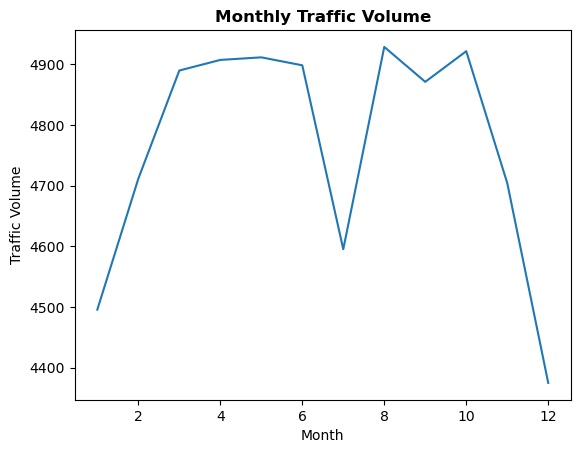

In [197]:
day['Month'] = day['date_time'].dt.month.astype(int)
by_month = day.groupby('Month').agg({'traffic_volume': 'mean'})
by_month['traffic_volume'].plot.line()
plt.ylabel('Traffic Volume')
plt.title('Monthly Traffic Volume', fontweight='bold')
plt.show()

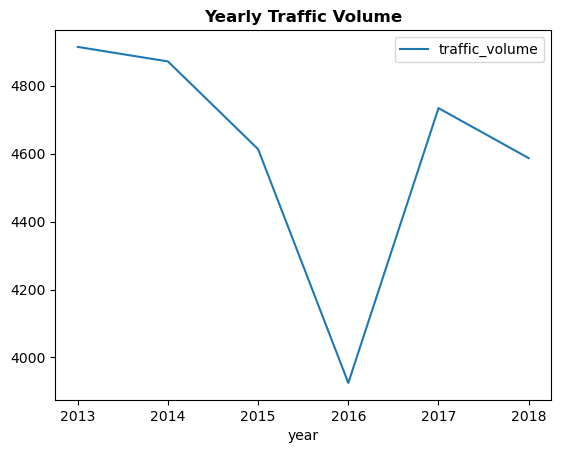

In [202]:
day['year'] = day['date_time'].dt.year.astype(int)
july = day[day['Month'] == 7]
july_groupby = july.groupby('year').agg({'traffic_volume': 'mean'})
july_groupby.plot.line()
plt.title('Yearly Traffic Volume', fontweight='bold')
plt.show()

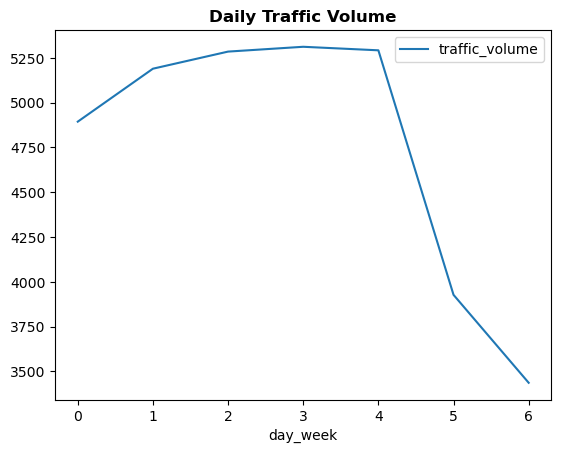

In [203]:
day['day_week'] = day['date_time'].dt.dayofweek
by_week = day.groupby('day_week').agg({'traffic_volume':'mean'})
by_week.plot.line()
plt.title('Daily Traffic Volume', fontweight='bold')
plt.show()

In [128]:
day['hour'] = day['date_time'].dt.hour.astype(int)
working_day = day.copy()[day['day_week'] <= 4]
by_working_day = working_day.groupby('hour').agg({'traffic_volume':'mean'})

weekend = day.copy()[day['day_week'] >=5]
by_weekend = weekend.groupby('hour').agg({'traffic_volume':'mean'})



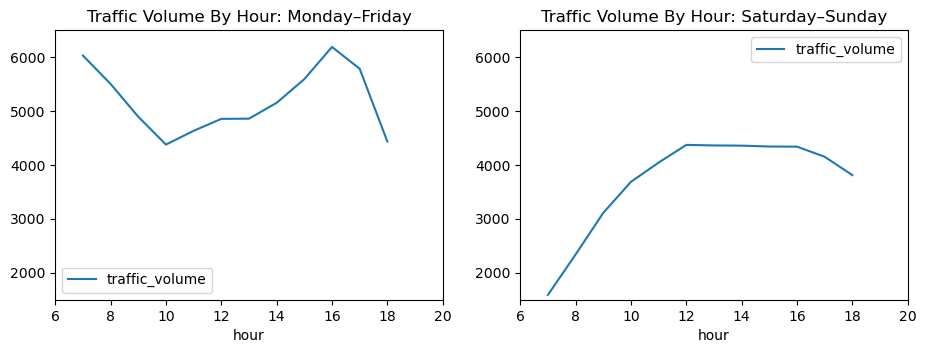

In [129]:
# Create a figure with the specified size
plt.figure(figsize=(11, 3.5))

# Create the first subplot for Monday–Friday traffic
plt.subplot(1, 2, 1)
ax1 = plt.gca()  # Get current axes for subplot
by_working_day.plot.line(ax=ax1)  # Pass the axes to the plot
plt.xlim(6, 20)
plt.ylim(1500, 6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

# Create the second subplot for Saturday–Sunday traffic
plt.subplot(1, 2, 2)
ax2 = plt.gca()  # Get current axes for subplot
by_weekend.plot.line(ax=ax2)  # Pass the axes to the plot
plt.xlim(6, 20)
plt.ylim(1500, 6500)
plt.title('Traffic Volume By Hour: Saturday–Sunday')

# Show the plot
plt.show()


### Summary of Findings: Time Indicators for Heavy Traffic

Based on the analysis of traffic volume data on I-94, several time-based patterns indicating heavy traffic have been identified. These findings are crucial for traffic management, planning, and optimization.

#### 1. Daily Traffic Volume Patterns

**Business Days vs. Weekends**:
- **Business Days**:
  - **Morning Rush Hour**: 6 AM to 9 AM, peaking around 7-8 AM.
  - **Evening Rush Hour**: 3 PM to 6 PM, peaking around 4-5 PM.
  - **Midday Lull**: Lower traffic volume between 10 AM and 2 PM.
  - **Nighttime Drop**: Significant decrease in traffic after 7 PM.
- **Weekends**:
  - **Moderate Morning Activity**: Starts increasing around 8 AM, stabilizing by 10 AM.
  - **Steady Afternoon Volume**: Consistent traffic from 10 AM to 4 PM.
  - **Evening Decrease**: Traffic volume declines starting around 5-6 PM.
  - **No Clear Rush Hours**: More evenly distributed traffic throughout the day.

#### 2. Monthly Traffic Volume Patterns

- Traffic volume shows fluctuations across different months.
- Generally higher traffic volume during warmer months (April to October) compared to colder months (November to March).
- Notable exceptions:
  - **July**: Slight dip in traffic, potentially due to vacations or holidays.
  - **December**: Lower traffic volume, possibly influenced by winter weather and holidays.

#### 3. Hourly Traffic Volume Patterns

- **Morning Rush Hour**: Traffic starts increasing sharply from 6 AM, reaching its peak between 7-8 AM.
- **Midday Plateau**: After the morning rush, traffic volume levels off and remains relatively stable throughout the day.
- **Evening Rush Hour**: Another increase in traffic volume occurs between 3 PM and 6 PM, with a peak around 4-5 PM.
- **Nighttime Lull**: Traffic volume decreases significantly after 7 PM, remaining low throughout the night.

### Conclusion

The analysis highlights specific time periods with heavy traffic, providing key insights for traffic management:
- **Morning and Evening Rush Hours on Business Days**: Targeted interventions such as traffic signal optimization, public transport promotion, and congestion pricing can be implemented.
- **Consistent Midday and Evening Traffic on Weekends**: Different strategies might be needed to manage leisure-related traffic compared to weekday commuter traffic.
- **Monthly Variations**: Understanding seasonal traffic patterns can aid in planning maintenance and infrastructure projects.

These findings can help in optimizing traffic flow, reducing congestion, and improving overall transportation efficiency on I-94.

## Weather indicator

In [133]:
# Select only numeric columns from the 'day' DataFrame
numeric_day = day.select_dtypes(include=['number'])

# Calculate the correlation and select the 'traffic_volume' column
traffic_volume_corr = numeric_day.corr()['traffic_volume']

# Display the correlation values
print(traffic_volume_corr)


temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
day_week         -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64


Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (`rain_1h, snow_1h, clouds_all`) don't show any strong correlation with `traffic_volume`.

Let's generate a scatter plot to visualize the correlation between `temp` and `traffic_volume`.

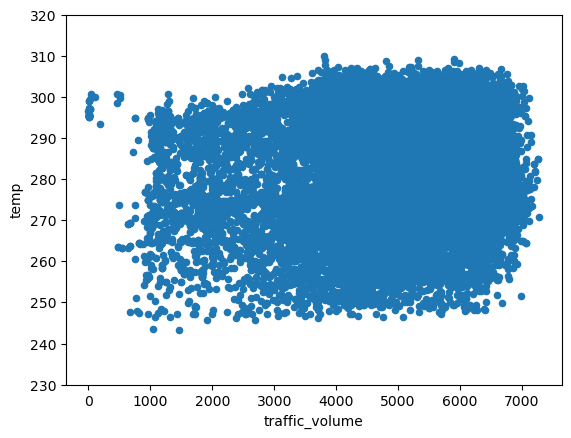

In [145]:
day.plot.scatter(x= 'traffic_volume', y ='temp')
plt.ylim(230, 320)
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

Let's now look at the other weather-related columns: weather_main and weather_description.

## Weather Types

In [155]:
by_weather_main = day.groupby('weather_main').agg({'traffic_volume': 'mean'})
by_weather_desc = day.groupby('weather_description').agg({'traffic_volume': 'mean'})

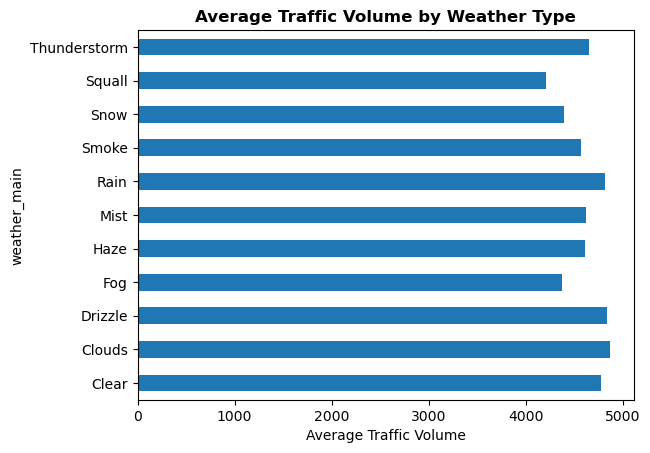

In [206]:
by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Weather Type', fontweight='bold')
plt.show()

### Analysis of Average Traffic Volume by Weather Type

Based on the horizontal bar plot:

- There are no weather types where the average traffic volume exceeds 5,000 cars. This suggests that weather type alone might not be a strong indicator of heavy traffic volume.
- Some weather types show higher average traffic volumes than others, but the differences are not substantial enough to indicate a specific weather type as a clear heavy traffic indicator.
- More detailed analysis may be needed, possibly incorporating other variables or looking at combinations of factors to identify conditions under which heavy traffic occurs.

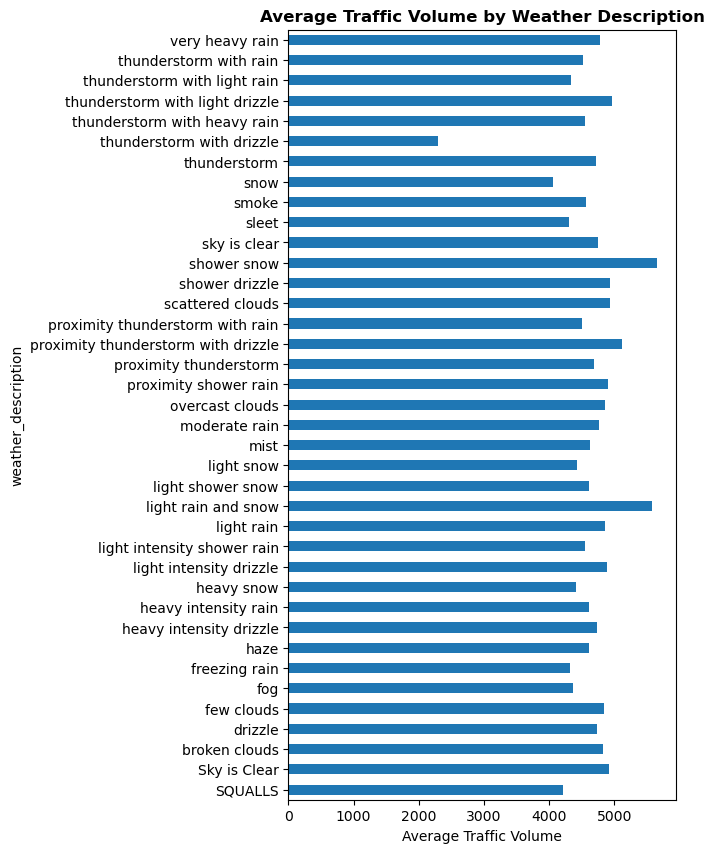

In [207]:
by_weather_desc['traffic_volume'].plot.barh(figsize=(5,10))
plt.title('Average Traffic Volume by Weather Description', fontweight='bold')
plt.xlabel('Average Traffic Volume')
plt.show()

### Analysis of Average Traffic Volume by Weather Description

Based on the horizontal bar plot and the provided dataset:

- **Traffic Volume Exceeding 5,000 Cars**: 
  - There are a few weather descriptions where the average traffic volume exceeds 5,000 cars. These are:
    - Light rain and snow: 5579.75 cars
    - Shower snow: 5664.00 cars

- **Heavy Traffic Indicators**:
  - The weather descriptions "Light rain and snow" and "Shower snow" stand out as potential indicators of heavy traffic, given their average traffic volumes exceeding 5,000 cars.
  - Most other weather descriptions do not show traffic volumes exceeding 5,000 cars, suggesting that they might not be as strong indicators of heavy traffic.

### Observations:
- **High Traffic Volumes**:
  - "Light rain and snow" and "Shower snow" have significantly higher average traffic volumes compared to other weather descriptions, indicating that these weather conditions might contribute to heavy traffic on I-94.
  - Other weather descriptions such as "Sky is Clear," "Scattered clouds," and "Proximity shower rain" have average traffic volumes in the range of 4,500 to 4,700 cars but do not exceed the 5,000-car threshold.

- **Overall Trend**:
  - The majority of weather descriptions have average traffic volumes below 5,000 cars, indicating that weather type alone might not be a strong predictor of heavy traffic.
  - Further analysis might be needed to explore combinations of weather conditions and other factors (e.g., time of day, day of the week) to better understand their impact on traffic volume.

### Conclusion:
- **Potential Indicators**:
  - "Light rain and snow" and "Shower snow" are potential indicators of heavy traffic as they exceed the 5,000 cars threshold.
  - Other weather descriptions might not serve as strong indicators of heavy traffic, but they still influence traffic volumes to varying degrees.

## Conclusion

This project set out to identify key indicators of heavy traffic on the westbound stretch of I-94 near the station located between Minneapolis and Saint Paul. By analyzing traffic volume data using Python and its data analysis libraries, we focused on understanding the influence of various factors, including time of day, day of the week, and weather conditions.

Our findings reveal that traffic volumes are highest during the morning and evening rush hours on business days, with lower volumes during nighttime and weekends. Weather conditions, particularly "Light rain and snow" and "Shower snow," correlate with increased traffic but show only a weak overall impact. These results offer insights for improving traffic management specific to the westbound direction near this station and should not be generalized to the entire I-94 highway.